https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/Zackory/Keras-MNIST-GAN/blob/master/mnist_gan.py


In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam, SGD
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
tr_im = np.loadtxt("reals.dat")

In [3]:
tr_im.shape

(20000, 4000)

In [4]:
nrow,ncol = 80,50

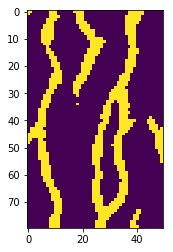

In [5]:
plt.imshow(tr_im[0,:].reshape((nrow,ncol)))

In [6]:
npar = 100 #number of standard normal deviates to feed to generator input

In [100]:
#opt = tf.train.AdamOptimizer(learning_rate=0.0005,beta1=0.5)
opt_gen = Adam(lr=0.00002,beta_1=0.5)
opt_dis = SGD(lr=0.00002)

In [101]:
tr_im.max(),tr_im.min()

(1.0, 0.0)

In [102]:
generator = Sequential()
generator.add(Dense(100*8*5, input_shape=(npar,), kernel_initializer=keras.initializers.RandomUniform(minval=-2, maxval=2.0)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((100, 8, 5)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(256, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(128, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(64, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(5, 5)))
generator.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
generator.compile(loss='binary_crossentropy', optimizer=opt_gen)
#generator.summary()


In [103]:
# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding='same', input_shape=(1, 80, 50), kernel_initializer=initializers.RandomNormal(mean=0.5,stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(256, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(512, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt_gen)
#discriminator.summary()

In [104]:
discriminator.trainable = False
gi = Input(shape=(npar,))
x = generator(gi)
go = discriminator(x)
gan = Model(inputs=gi,outputs=go)
gan.compile(loss="binary_crossentropy",optimizer=opt_gen)

[[[0.50775504 0.69307595 0.69307595 ... 0.03731991 0.03731991 0.04182775]
  [0.22947472 0.2221106  0.2221106  ... 0.02800932 0.02800932 0.04355698]
  [0.22947472 0.2221106  0.2221106  ... 0.02800932 0.02800932 0.04355698]
  ...
  [0.5699399  0.10668902 0.10668902 ... 0.37708873 0.37708873 0.34680426]
  [0.5699399  0.10668902 0.10668902 ... 0.37708873 0.37708873 0.34680426]
  [0.61260384 0.481584   0.481584   ... 0.42448333 0.42448333 0.3709134 ]]]


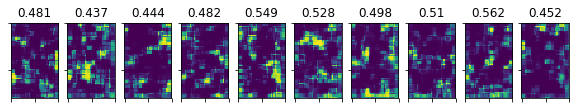

In [105]:

def plot_gen():
    fig, axes = plt.subplots(nrows=1,ncols=10,figsize = (10,10))
    plot_noise = np.random.randn(10,npar) 
    vecs = generator.predict(plot_noise)#.reshape(10,28,28)
    #print(vecs[0,:])
    isreal = discriminator.predict(vecs)
    #print(isreal.shape)
    for ax,vec,real in zip(axes.flatten(),vecs.reshape(10,nrow,ncol),isreal.flatten()):
        ax.imshow(vec)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title("{0:1.3G}".format(real))
plot_gen()
#generator.save("test.h5")
o_d = "gen_models"
if os.path.exists(o_d):
    shutil.rmtree(o_d)
os.mkdir(o_d)

78
[[[1.5724713e-02 1.3032739e-02 1.3032739e-02 ... 1.4958701e-01
   1.4958701e-01 4.5332232e-01]
  [2.1084564e-04 9.9217425e-05 9.9217425e-05 ... 1.0067290e-02
   1.0067290e-02 9.8634116e-02]
  [2.1084564e-04 9.9217425e-05 9.9217425e-05 ... 1.0067290e-02
   1.0067290e-02 9.8634116e-02]
  ...
  [1.0906220e-03 1.1717924e-03 1.1717924e-03 ... 1.5176226e-01
   1.5176226e-01 5.3022020e-03]
  [1.0906220e-03 1.1717924e-03 1.1717924e-03 ... 1.5176226e-01
   1.5176226e-01 5.3022020e-03]
  [1.9083068e-02 2.0184791e-02 2.0184791e-02 ... 1.4961334e-01
   1.4961334e-01 3.5081178e-02]]]


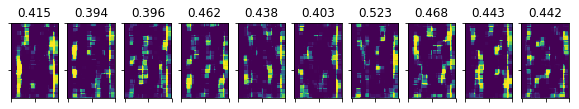

1 0.99967647 0.349191588
[[[5.6377533e-03 9.0872950e-04 9.0872950e-04 ... 6.3072830e-02
   6.3072830e-02 9.1564268e-02]
  [4.6670163e-04 3.5647241e-05 3.5647241e-05 ... 1.7270060e-02
   1.7270060e-02 3.8276549e-02]
  [4.6670163e-04 3.5647241e-05 3.5647241e-05 ... 1.7270060e-02
   1.7270060e-02 3.8276549e-02]
  ...
  [1.5725760e-03 3.3314375e-04 3.3314375e-04 ... 4.8152590e-03
   4.8152590e-03 7.0853829e-03]
  [1.5725760e-03 3.3314375e-04 3.3314375e-04 ... 4.8152590e-03
   4.8152590e-03 7.0853829e-03]
  [4.7406748e-02 1.2848334e-02 1.2848334e-02 ... 5.9368733e-02
   5.9368733e-02 1.7266390e-01]]]


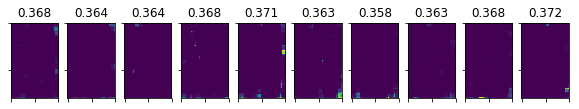

2 1.2213496 0.4495743885
[[[2.24383488e-01 1.22217424e-01 1.22217424e-01 ... 2.25363001e-02
   2.25363001e-02 1.59492623e-02]
  [4.78664972e-02 1.42497132e-02 1.42497132e-02 ... 1.89909176e-03
   1.89909176e-03 9.88270622e-04]
  [4.78664972e-02 1.42497132e-02 1.42497132e-02 ... 1.89909176e-03
   1.89909176e-03 9.88270622e-04]
  ...
  [1.43529624e-01 1.58671178e-02 1.58671178e-02 ... 1.31595286e-03
   1.31595286e-03 5.34314604e-04]
  [1.43529624e-01 1.58671178e-02 1.58671178e-02 ... 1.31595286e-03
   1.31595286e-03 5.34314604e-04]
  [6.66897833e-01 5.78337550e-01 5.78337550e-01 ... 5.95163070e-02
   5.95163070e-02 8.05603713e-02]]]


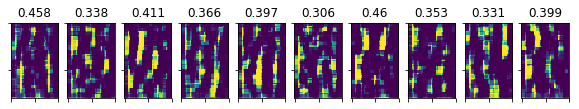

3 1.7165927 0.456222884
[[[4.5597011e-01 1.9867906e-02 1.9867906e-02 ... 6.9178641e-02
   6.9178641e-02 8.4938371e-01]
  [5.2663159e-01 5.6040836e-03 5.6040836e-03 ... 2.4736708e-02
   2.4736708e-02 9.0929884e-01]
  [5.2663159e-01 5.6040836e-03 5.6040836e-03 ... 2.4736708e-02
   2.4736708e-02 9.0929884e-01]
  ...
  [6.0374552e-01 3.7123710e-03 3.7123710e-03 ... 9.7226875e-05
   9.7226875e-05 5.2697057e-01]
  [6.0374552e-01 3.7123710e-03 3.7123710e-03 ... 9.7226875e-05
   9.7226875e-05 5.2697057e-01]
  [5.0418729e-01 4.7719110e-02 4.7719110e-02 ... 6.4300257e-04
   6.4300257e-04 5.9694678e-01]]]


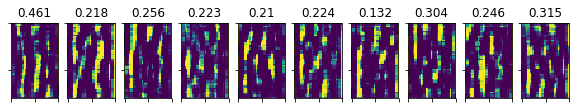

In [ ]:
batch_size = 256
batch_count = int(tr_im.shape[0] / batch_size)
print(batch_count)
plot_gen()
plt.show()
for e in range(1,300):
    for bc in range(batch_count):
        noise = np.random.randn(batch_size,npar)
        tr_im_batch = tr_im[np.random.randint(0,tr_im.shape[0],size=batch_size)]
        gen_im = generator.predict(noise)
        tr_im_batch = np.resize(tr_im_batch,(batch_size,1,nrow,ncol))
        #print(gen_im.shape,tr_im_batch.shape)
        tr_im_batch = np.concatenate([tr_im_batch,gen_im])
        #noisy labels and flipped labels...
        tr_im_lab = np.zeros(tr_im_batch.shape[0])
        if np.random.rand(1) <= 0.025:
            tr_im_lab[batch_size:] = np.random.uniform(0.9,1.0,size=batch_size)
            tr_im_lab[:batch_size] = np.random.uniform(0.0,0.1,size=batch_size)
        else:
            tr_im_lab[:batch_size] = np.random.uniform(0.9,1.0,size=batch_size)
            tr_im_lab[batch_size:] = np.random.uniform(0.0,0.1,size=batch_size)
        discriminator.trainable = True
        dloss = discriminator.train_on_batch(tr_im_batch,tr_im_lab)
        noise = np.random.randn(batch_size,npar)
        tr_img_lab = np.ones(batch_size)
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise,tr_img_lab)
        print(bc,gloss,dloss,end="\r")
    if e % 1 == 0:
        print(e,gloss,dloss)
        plot_gen()
        plt.show()
        generator.save(os.path.join(o_d,"gen_{0}.h5").format(e))
        
    